In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit

In [13]:
plt.rcParams['font.size'] = 19
plt.rcParams['axes.linewidth'] = 1.5

# 1ª Sessão

## Calibração

In [14]:
def img_to_matrix(img):
    width, height = img.size
    pixels = img.load() #returns dictionary where each entry has rgb values
    
    matrix = list()
    row  = list()
    for y in range(height):
        row = []
        for x in range(width):
            row += [pixels[x, y]]
        matrix.append(row)
    return matrix

def soma_linhas(pixels, orientation='x'):
    if orientation=='x':
        soma = list()
        for i in range(width):
            soma += [0]
        for i in range(height):
            for j in range(width):
                soma[j] += pixels[i][j]
        return soma
    else:
        soma = list()
        for i in range(height):
            soma += [0]
        for i in range(width):
            for j in range(height):
                soma[j] += pixels[j][i]
        return soma
            
def normalize(linha):
    res = list()
    peak = max(linha)
    for ponto in linha:
        res.append(ponto/peak)
    return res 

## 1mm

    Não me posso esquecer de ter em conta a inclinação da cena!

In [28]:
img_path = '/Users/thomasgaehtgens/Desktop/LFEA/Ótica Coerente/Dados/1a_sesh/craveira_1mm.tif'

In [29]:
img = Image.open(img_path)
width, height = img.size

pixels = img_to_matrix(img)
linha = soma_linhas(pixels)

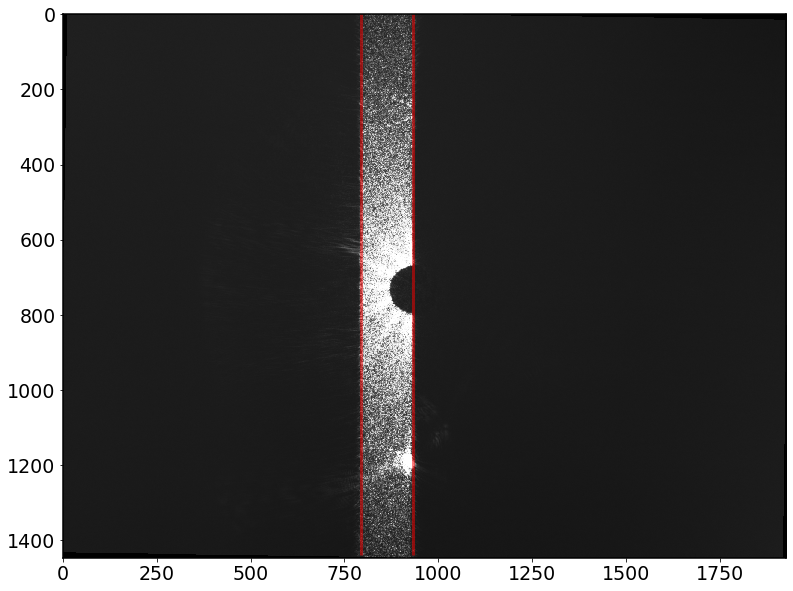

In [30]:
fig     = plt.figure(figsize=(20, 10))

rotated = img.rotate(-0.9)

plt.imshow(rotated, cmap='gray', zorder=1)

plt.vlines(795, 0, 1440, color='red', lw=3, zorder=2, alpha=0.5)
plt.vlines(932, 0, 1440, color='red', lw=3, zorder=2, alpha=0.5)

img = rotated

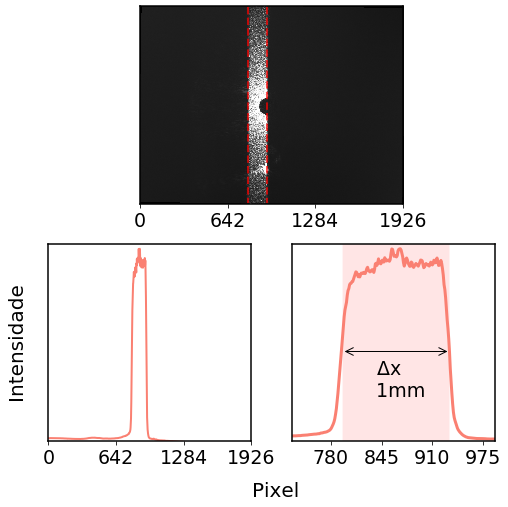

In [31]:
fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(2, 2, (1, 2))
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(642))
ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(642))
ax3.xaxis.set_major_locator(mpl.ticker.MultipleLocator(65))

ax1.imshow(img, cmap='gray')
ax1.vlines(790, 0, 1440, color='red', lw=2, zorder=2, linestyles='--', alpha=0.7)
ax1.vlines(932, 0, 1440, color='red', lw=2, zorder=2, linestyles='--', alpha=0.7)
#ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)


ax2.plot(linha, color='salmon', lw=2)
ax2.yaxis.set_visible(False)
ax2.set_xlim(0, 1928)
ax2.set_ylim(1e7, 5.4e7)

areay = np.linspace(-1e7, 10e7, width)

ax3.fill_betweenx(areay, 795, 932, facecolor ='red', alpha = 0.1)

ax3.annotate(r'', xy=(795, 3e7), xytext=(932, 3e7),
            arrowprops={'arrowstyle': '<->'}, va='center')
ax3.annotate(r'   $\Delta$x' + "\n   " + '1mm', xy=(815, 2e7))

ax3.plot(linha, color='salmon', lw=3)
ax3.yaxis.set_visible(False)
ax3.set_xlim(730, 990)
ax3.set_ylim(1e7, 5.4e7)

fig.text(0.52, 0.04, 'Pixel', ha='center', va='center', fontsize=20)
fig.text(0.07, 0.3, 'Intensidade', ha='center', va='center', rotation='vertical', fontsize=20)

plt.savefig('1mm.pdf', hbox='tight_layout')

## 2mm

In [32]:
img_path = '/Users/thomasgaehtgens/Desktop/LFEA/Ótica Coerente/Dados/1a_sesh/craveira_2mm.tif'

In [323]:
img = Image.open(img_path)
width, height = img.size

pixels = img_to_matrix(img)
linha = soma_linhas(pixels)

Rodar a imagem para ficar direita

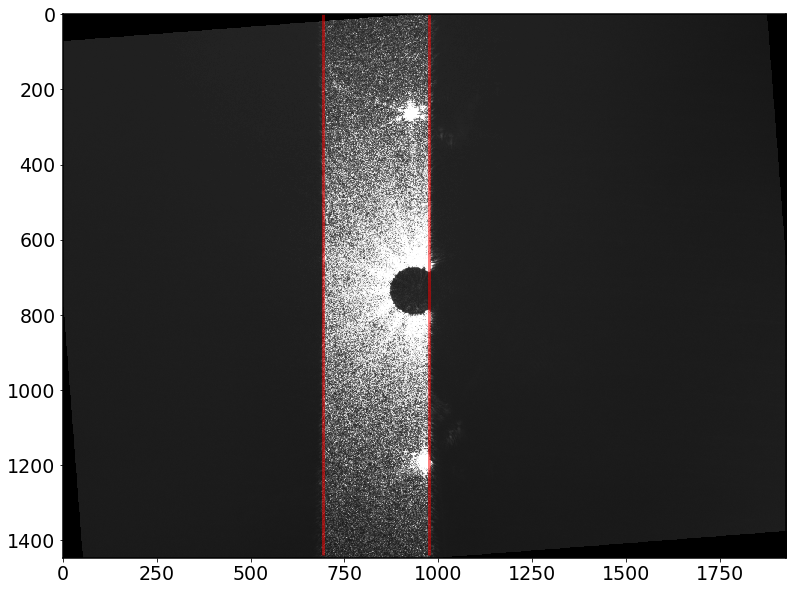

In [331]:
fig     = plt.figure(figsize=(20, 10))

rotated = img.rotate(4.4)

plt.imshow(rotated, cmap='gray', zorder=1)

plt.vlines(692, 0, 1440, color='red', lw=3, zorder=2, alpha = 0.5)
plt.vlines(974, 0, 1440, color='red', lw=3, zorder=2, alpha = 0.5)

img = rotated

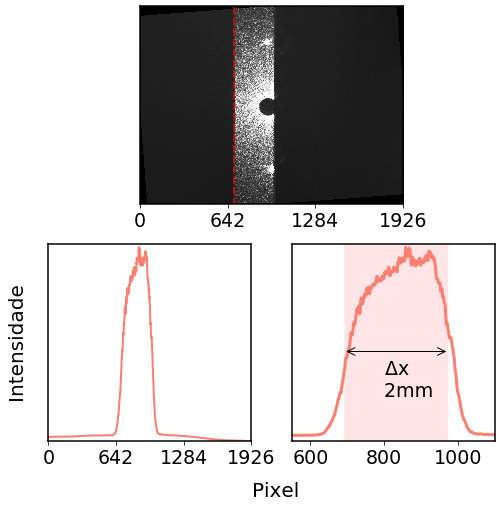

In [333]:
fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(2, 2, (1, 2))
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(642))
ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(642))
#ax3.xaxis.set_major_locator(mpl.ticker.MultipleLocator(65))

ax1.imshow(img, cmap='gray')
ax1.vlines(690, 0, 1440, color='red', lw=2, zorder=2, linestyles='--', alpha=0.7)
#ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)


ax2.plot(linha, color='salmon', lw=2)
ax2.yaxis.set_visible(False)
ax2.set_xlim(0, 1928)
ax2.set_ylim(1e7, 5.4e7)

areay = np.linspace(-1e7, 10e7, width)

ax3.fill_betweenx(areay, 692, 974, facecolor ='red', alpha = 0.1)

ax3.annotate(r'', xy=(692, 3e7), xytext=(974, 3e7),
            arrowprops={'arrowstyle': '<->'}, va='center')
ax3.annotate(r'   $\Delta$x' + "\n   " + '2mm', xy=(750, 2e7))

ax3.plot(linha, color='salmon', lw=3)
ax3.yaxis.set_visible(False)
ax3.set_xlim(550, 1100)
ax3.set_ylim(1e7, 5.4e7)

fig.text(0.52, 0.04, 'Pixel', ha='center', va='center', fontsize=20)
fig.text(0.07, 0.3, 'Intensidade', ha='center', va='center', rotation='vertical', fontsize=20)

plt.savefig('2mm.pdf', hbox='tight_layout')

# RONCHI

In [435]:
def ronchi(x, A, a, d, M):
    v = x
    return A*((np.sin(np.pi*a*v)**2)/((np.pi*v)**2))*((np.sin(np.pi*M*d*v)**2)/np.sin((np.pi*d*v))**2)

def envolvente(x, A, a, d, M):
    v = x
    return A*((np.sin(np.pi*a*v)**2)/((np.pi*v)**2))

def fina(x, A, a, d, M):
    v = x
    return ((np.sin(np.pi*M*d*v)**2)/np.sin((np.pi*d*v))**2)

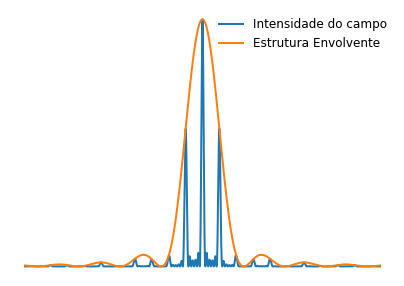

In [443]:
fig = plt.figure(figsize=(7, 5))

A=3.19
a=0.123
d=0.30
M=6

x = np.linspace(-35, 35, 100000)

ax = plt.gca()
ax.plot(x, ronchi(x, A, a, d, M), lw=2, label='Intensidade do campo')

x = np.linspace(-35, 35, 1000)
ax.plot(x, envolvente(x, A*36, a, d, M), lw=2, label='Estrutura Envolvente')

plt.legend(frameon=False, fontsize=12)

plt.axis(False)
#ax.set_yscale('log')
#ax.set_ylim(10**(-7), 60)

plt.savefig('Intensidade_campo.pdf', bbox_inches='tight')

In [ ]:
imgs = ['2mmexposed.tif', '5mm.tif', '5mmexposed.tif', '10mm2.tif', '10mmexposed.tif', '15mm.tif' ,'15mmexposed.tif', '20mm.tif']
for i in range(len(imgs)):
    imgs[i] = '/Users/thomasgaehtgens/Desktop/1a_sessao/ronchibons/' + imgs[i]

In [39]:
for img_path in imgs:
    fig=plt.figure()
    im = Image.open(img_path)

    pixels = img_to_matrix(im)
    linha = soma_linhas(pixels)
    
    plt.plot(linha)
    ax = plt.gca()
    ax.yaxis.set_visible(False)
    
    plt.savefig('teste.pdf')
    #plt.imshow(im, cmap='gray')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/thomasgaehtgens/Desktop/1a_sessao/ronchibons/2mmexposed.tif'

<Figure size 432x288 with 0 Axes>

<div align="center" style="font-weight: bold; font-size:30px">PARÂMETRO D</div>

<p align="center">
  <img width="200" src="http://material-bread.org/logo-shadow.svg" alt="Material Bread logo">
</p>

# TEM's

Calculates pixel coordinates

In [ ]:
import cv2
import numpy as np

coords = []
# Picture path
img = cv2.imread('/Users/thomasgaehtgens/Desktop/LFEA/Ótica Coerente/Dados/1a_sesh/tem3exposed.tif')
a = []
b = []
 
def on_EVENT_LBUTTONDOWN(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        xy = "%d,%d" % (x, y)
        a.append(x)
        b.append(y)
        cv2.circle(img, (x, y), 1, (0, 0, 255), thickness=-1)
        cv2.putText(img, xy, (x, y), cv2.FONT_HERSHEY_PLAIN,
                    fontScale=2, color=(255, 255, 255), thickness=4)
        cv2.imshow("image", img)
        print(x,y)
 
 
cv2.namedWindow("image")
cv2.setMouseCallback("image", on_EVENT_LBUTTONDOWN)
cv2.imshow("image", img)
cv2.waitKey(0)
print(a[0], b[0])

coords += [[a[0],  b[0]]]


# TEMI

In [239]:
coords = [
[606,    365],
[781,    371],
[956,    373],
[1130,   371],
[1313,   371],
    
[604,    542],
[776,    547],
[948,    546],
[1126,   551],
[1302,   552],
#[49,     713],
#[241,    715],
[599,    717],
[772,    720],
[1119,   727],
[1297,   733],
#[1673,   742],
[596,    898],
[769,    900],
[943,    900],
[1117,   908],
[1294,   912],
  
[591,   1079],   
[765,   1081],
[937,   1082],
[1116,  1086],
[1294,  1098]
]

In [240]:
colunas = [5, 5, 4, 5, 5]
linha   = []
matriz  = []

count = 0
for i in coords:
    if count == colunas[0] - 1:
        linha.append(i)
        colunas.pop(0)
        count = 0
        matriz.append(linha)
        linha = []
    else:
        count += 1
        linha.append(i)

### Distância horizontal

In [243]:
dist_h = []

for i in matriz:
    for j in range(len(i) - 1):
        dist_h.append(np.sqrt((i[j + 1][0] - i[j][0])**2 + (i[j + 1][1] - i[j][1])**2))        

In [244]:
dist_h

[175.10282693320517,
 175.0114281982751,
 174.01149387324966,
 183.0,
 172.07265907168403,
 172.00290695217916,
 178.07021087200408,
 176.00284088616297,
 173.02600960549256,
 347.0705980056507,
 178.10109488714548,
 173.0115603073968,
 174.0,
 174.18381095842403,
 177.04519197086375,
 174.01149387324966,
 172.00290695217916,
 179.0446871593793,
 178.4040358287895]

In [245]:
dist_h.pop(dist_h.index(max(dist_h)))

347.0705980056507

In [246]:
avg = 0
for i in dist_h:
    avg += i
avg /= len(dist_h)

In [247]:
round(avg, 2) #in pixels

175.45

### Distância vertical

Inverter a matriz com as coordenadas dos pontos

In [248]:
max_len = 0
for i in matriz:
    if len(i) > max_len:
        max_len = len(i)
print(max_len)

5


In [249]:
for i in range(len(matriz)):
    if (len(matriz[i])%2 == 0):
        meio = int(len(matriz[i])/2)
        matriz[i] = matriz[i][:meio] + [0] + matriz[i][meio:]
        
    else:
        while len(matriz[i]) < max_len:
            matriz[i] = [0] + matriz[i] + [0]
            
t_matriz = [[matriz[j][i] for j in range(len(matriz))] for i in range(len(matriz[0]))]

for i in t_matriz:
    for j in i:
        if j == 0:
            i.pop(i.index(j))

In [250]:
t_matriz

[[[606, 365], [604, 542], [599, 717], [596, 898], [591, 1079]],
 [[781, 371], [776, 547], [772, 720], [769, 900], [765, 1081]],
 [[956, 373], [948, 546], [943, 900], [937, 1082]],
 [[1130, 371], [1126, 551], [1119, 727], [1117, 908], [1116, 1086]],
 [[1313, 371], [1302, 552], [1297, 733], [1294, 912], [1294, 1098]]]

In [251]:
dist_v = []

for i in t_matriz:
    for j in range(len(i) - 1):
        dist_v.append(np.sqrt((i[j + 1][0] - i[j][0])**2 + (i[j + 1][1] - i[j][1])**2))   

In [252]:
dist_v.pop(dist_v.index(max(dist_v)))

354.0353089735542

In [253]:
avg = 0
for i in dist_v:
    avg += i
avg /= len(dist_v)

In [254]:
round(avg, 2) #in pixels

179.02

# TEMII

In [ ]:
coords = [
[ 420,  189  ],
[ 691,  200  ],
[ 954,  201  ],
[1221, 201   ],
[1498,  194  ],
    
[ 422, 454   ],
[ 686, 458   ],   
[ 946, 462   ],
[1210, 465   ],
[1484, 470   ],
#[ 144, 714   ],
    
[ 422, 716   ],
[ 685, 717   ],
[1204, 723   ],
[1477, 733   ],
    
#[1770, 739   ],
[ 415, 982   ],
[ 681, 981   ],
[ 941, 981   ],
[1205, 989   ],    
[1479, 1001  ],
    
[410,  1254  ],    
[ 677, 1251  ],
[ 940, 1254  ],
[1208, 1262  ],
[1485, 1276]]

In [ ]:
colunas = [5, 5, 4, 5, 5]
linha   = []
matriz  = []

count = 0
for i in coords:
    if count == colunas[0] - 1:
        linha.append(i)
        colunas.pop(0)
        count = 0
        matriz.append(linha)
        linha = []
    else:
        count += 1
        linha.append(i)

### Distância horizontal

In [ ]:
dist_v = []
dist_h = []

for i in matriz:
    for j in range(len(i) - 1):
        dist_h.append(i[j + 1][0] - i[j][0])        

In [ ]:
dist_h.pop(dist_h.index(max(dist_h)))

In [ ]:
dist_h

In [ ]:
avg = 0
for i in dist_h:
    avg += i
avg /= len(dist_h)

In [ ]:
avg #in pixels

### Distância vertical

In [352]:
max_len = 0
for i in matriz:
    if len(i) > max_len:
        max_len = len(i)
print(max_len)

5


In [353]:
for i in range(len(matriz)):
    if (len(matriz[i])%2 == 0):
        meio = int(len(matriz[i])/2)
        matriz[i] = matriz[i][:meio] + [0] + matriz[i][meio:]
        
    else:
        while len(matriz[i]) < max_len:
            matriz[i] = [0] + matriz[i] + [0]
            
t_matriz = [[matriz[j][i] for j in range(len(matriz))] for i in range(len(matriz[0]))]

for i in t_matriz:
    for j in i:
        if j == 0:
            i.pop(i.index(j))

In [354]:
t_matriz

[[[250, 370], [253, 719], [245, 1074]],
 [[606, 378], [605, 722], [600, 1066]],
 [[950, 381], [943, 1069]],
 [[1301, 385], [1291, 730], [1291, 1078]],
 [[1674, 379], [1663, 738], [1664, 1099]]]

In [356]:
dist_v = []

for i in t_matriz:
    for j in range(len(i) - 1):
        dist_v.append(np.sqrt((i[j + 1][0] - i[j][0])**2 + (i[j + 1][1] - i[j][1])**2))
        
dist_v.pop(dist_v.index(max(dist_v)))

avg = 0
for i in dist_v:
    avg += i
avg /= len(dist_v)

print(round(avg, 2))

350.68


## TEM III

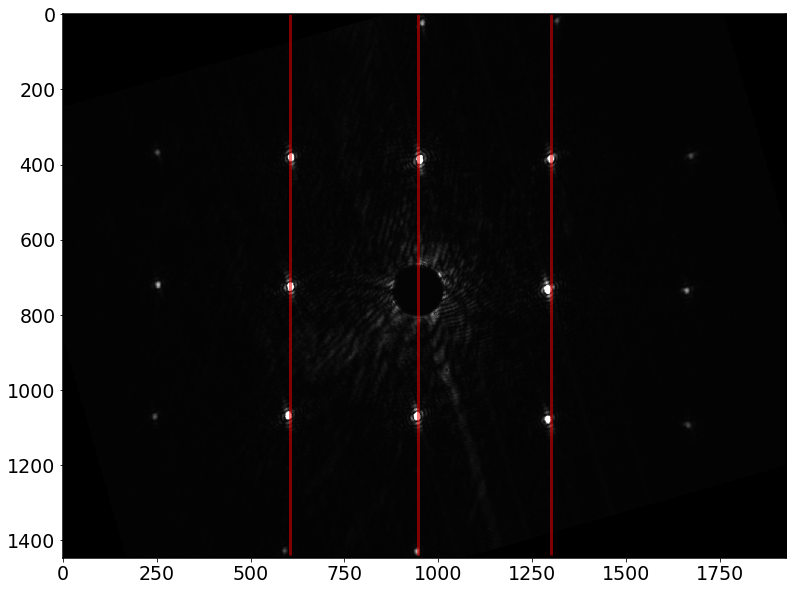

In [32]:
img_path = '/Users/thomasgaehtgens/Desktop/LFEA/Ótica Coerente/Dados/1a_sesh/tem3exposed.tif'

img = Image.open(img_path)
width, height = img.size

pixels = img_to_matrix(img)
linha = soma_linhas(pixels)

fig     = plt.figure(figsize=(20, 10))

rotated = img.rotate(16)

plt.imshow(rotated, cmap='gray', zorder=1)

plt.vlines(605, 0, 1440, color='red', lw=3, zorder=2, alpha=0.5)
plt.vlines(945, 0, 1440, color='red', lw=3, zorder=2, alpha=0.5)
plt.vlines(1300, 0, 1440, color='red', lw=3, zorder=2, alpha=0.5)

img = rotated

In [ ]:
import cv2
import numpy as np

coords = []
# Picture path
img = cv2.imread('tem3_análise.tiff')
a = []
b = []
 
def on_EVENT_LBUTTONDOWN(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        xy = "%d,%d" % (x, y)
        a.append(x)
        b.append(y)
        cv2.circle(img, (x, y), 1, (0, 0, 255), thickness=-1)
        cv2.putText(img, xy, (x, y), cv2.FONT_HERSHEY_PLAIN,
                    fontScale=2, color=(255, 255, 255), thickness=4)
        cv2.imshow("image", img)
        print(x,y)
 
 
cv2.namedWindow("image")
cv2.setMouseCallback("image", on_EVENT_LBUTTONDOWN)
cv2.imshow("image", img)
cv2.waitKey(0)
print(a[0], b[0])

coords += [[a[0],  b[0]]]



247 1076
600 1068
941 1070
1290 1078
1664 1099


In [56]:
coords = [
#[958 ,   27],
#[1319,   21],
    
[250 ,  370],
[606 ,  378],
[950 ,  381],
[1301,  385],
[1674,  379],
    
[253 ,  719],
[605 ,  722],
[1291,  730],
[1663,  738],
    
[245 , 1074],
[600 , 1066],
[943 , 1069],
[1291, 1078],
[1664, 1099]

    
#,[592 , 1432],
#[942 , 1430]
]

In [55]:
colunas = [5, 4, 5]
linha   = []
matriz  = []

count = 0
for i in coords:
    if count == colunas[0] - 1:
        linha.append(i)
        colunas.pop(0)
        count = 0
        matriz.append(linha)
        linha = []
    else:
        count += 1
        linha.append(i)

IndexError: list index out of range

### Distância Horizontal

In [350]:
dist_v = []
dist_h = []

for i in matriz:
    for j in range(len(i) - 1):
        dist_h.append(np.sqrt((i[j + 1][0] - i[j][0])**2 + (i[j + 1][1] - i[j][1])**2))        

In [351]:
dist_h.pop(dist_h.index(max(dist_h)))

avg = 0
for i in dist_h:
    avg += i
avg /= len(dist_h)

print(avg)

356.80830920487733


### Distância Vertical

In [14]:
dist_v = 346.0

<div align="center" style="font-weight: bold; font-size:30px">PARÂMETRO M</div>

<p align="center">
  <img width="200" src="http://material-bread.org/logo-shadow.svg" alt="Material Bread logo">
</p>

Delimitar o espaço em torno dos pontos da rede (quadrado) e fazer um fit horizontal e/ou vertical em torno de todos os pontos

## TEMI

### FIT FUNCTION

In [5]:
def tem_fit(v, M, d, A, p):
    return A*(((np.sin(np.pi*M*d*v)))/((np.sin(np.pi*d*v))))**2

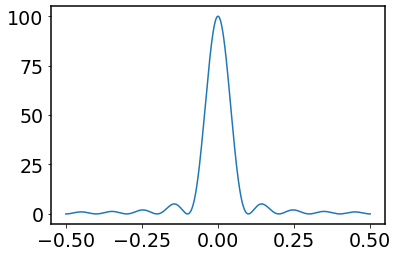

In [6]:
x = np.linspace(-0.5, 0.5, 10000)
plt.plot(x, tem_fit(x, 10, 1, 1, 0))

In [29]:
ds = [[249.32e-6, 244.35e-6], [267.50e-6, 266.28e-6], [122.60e-6, 124.74e-6]]

In [100]:
coords = [
#[958 ,   27],
#[1319,   21],
    
[250 ,  370],
[606 ,  378],
[950 ,  381],
[1301,  385],
[1674,  379],
    
[253 ,  719],
[605 ,  722],
[1291,  730],
[1663,  738],
    
[245 , 1074],
[600 , 1066],
[943 , 1069],
[1291, 1078],
[1664, 1099]

    
#,[592 , 1432],
#[942 , 1430]
]

In [103]:
img_path = '/Users/thomasgaehtgens/Desktop/LFEA/Ótica Coerente/Dados/1a_sesh/tem3normal.tif'

img = Image.open(img_path)
img = img.rotate(16) #FOR TEMIII

width, height = img.size

pixels = img_to_matrix(img)
linha = soma_linhas(pixels)

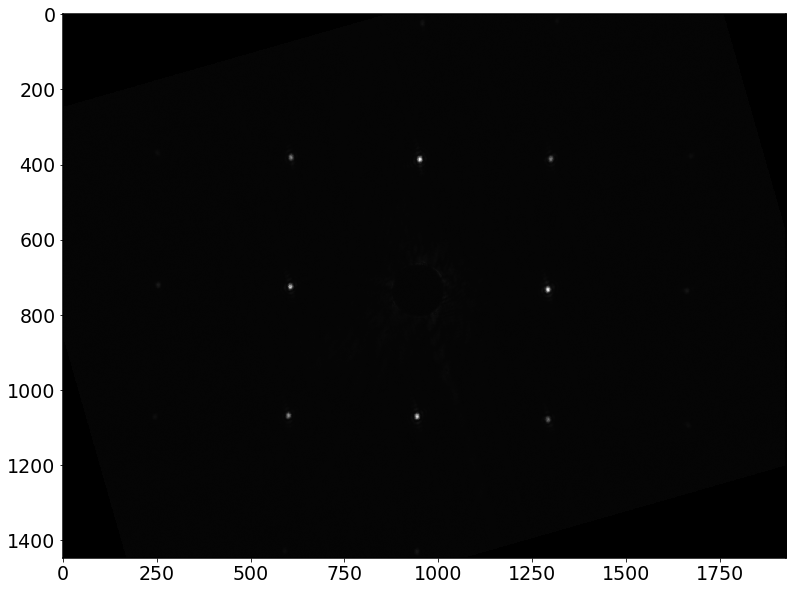

In [104]:
fig     = plt.figure(figsize=(20, 10))

plt.imshow(img, cmap='gray', zorder=1)

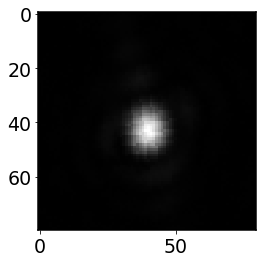

In [192]:
side = 40
locl = 7

region = img.crop((coords[locl][0] - side, coords[locl][1] - side,coords[locl][0] + side, coords[locl][1] + side))
width, height = img.size

dist = list()
for i in range(2*side):
    dist.append(get_d(coords[locl][0] - side + i))

plt.imshow(region, cmap='gray')

In [199]:
width, height = region.size

pixels = img_to_matrix(region)
linha  = soma_linhas(pixels) #POR E TIRAR Y

In [200]:
#CONSTANTES
l  = 633e-9
fl = 0.25 #INVENTAMOS UM VALOR PARA ESTA DISTÂNCIA FOCAL?
A  = 0.51
pc = 3.69e-6

d = ds[2][0]

def test(u, M, u0, offset, A):
    return offset+A*(np.sin(np.pi*M*(d/2)*((u - u0)/(fl*l)))/np.sin(np.pi*(d/2)*((u - u0)/(fl*l))))**2

def get_d(pixel_distance):
    return 2*A*l*fl/(pixel_distance*pc)

def convert(x):
    return x*pc/A

def scale(x, scalar):
    return x*scalar

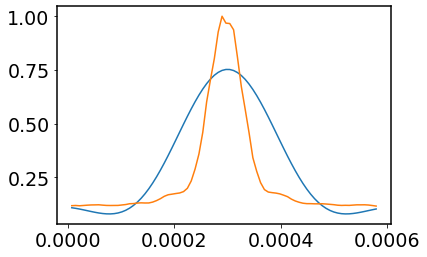

In [201]:
u = np.linspace(0, 0.0002, len(linha))

x = np.linspace(1, len(linha), len(linha))
u = convert(x)

plt.plot(u, test(u, M=11.6, u0=3e-4, offset=0.08, A=1/200))
plt.plot(u, normalize(linha))

In [202]:
popt, pcov = curve_fit(test, u, normalize(linha), p0=[11.6, 3e-4, 0.08, 1/200], maxfev=20000)

Text(0.5, 1.0, 'TEM3 (4, 3) - Vertical')

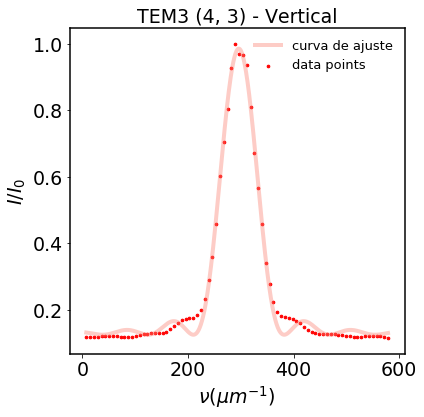

In [203]:
fig = plt.figure(figsize=(6, 6))


plt.plot(scale(np.linspace(u[0], u[-1], 1000), 1e6), test(np.linspace(u[0], u[-1], 1000), popt[0], popt[1], popt[2], popt[3]), alpha=0.4, lw=4, color='salmon', label='curva de ajuste')
plt.scatter(scale(u, 1e6), normalize(linha), s=7, color='red', label='data points')

plt.xlabel(r'$\nu$($\mu$$m^{-1}$)')
plt.ylabel(r'$I/I_0$')

plt.legend(fontsize=13, frameon=False)
plt.title(r'TEM3 (4, 3) - Vertical', fontsize=19)

#plt.savefig('TEM3_4_3_V.pdf')

In [204]:
print('M = ' + str(popt[0]) + ' ' + '+/- ' + str(np.sqrt(pcov[0][0])))

M = 30.01149925463949 +/- 0.3313108761292754


<div align="center" style="font-weight: bold; font-size:30px">PARÂMETRO a</div>

<p align="center">
  <img width="200" src="http://material-bread.org/logo-shadow.svg" alt="Material Bread logo">
</p>

In [205]:
import pandas as pd

In [366]:
#CONSTANTES
l  = 633e-9
fl = 0.25 #INVENTAMOS UM VALOR PARA ESTA DISTÂNCIA FOCAL?
A  = 0.51
pc = 3.69e-6

d = ds[2][0]

def fit_func(u, a, I, u0, offset):
    return I*(np.sin(np.pi*a*((u - u0)/(fl*l)))/((u - u0)/(fl*l))) + offset

In [330]:
TEM1_V = pd.read_csv('/Users/thomasgaehtgens/Desktop/LFEA/Ótica Coerente/Dados/TEM1_a_V.csv')
TEM1_H = pd.read_csv('/Users/thomasgaehtgens/Desktop/LFEA/Ótica Coerente/Dados/TEM1_a_H.csv')

TEM2_V = pd.read_csv('/Users/thomasgaehtgens/Desktop/LFEA/Ótica Coerente/Dados/TEM2_a_V.csv')
TEM2_H = pd.read_csv('/Users/thomasgaehtgens/Desktop/LFEA/Ótica Coerente/Dados/TEM2_a_H.csv')

TEM3_V = pd.read_csv('/Users/thomasgaehtgens/Desktop/LFEA/Ótica Coerente/Dados/TEM3_a_V.csv')
TEM3_H = pd.read_csv('/Users/thomasgaehtgens/Desktop/LFEA/Ótica Coerente/Dados/TEM3_a_H.csv') 

(800, 1200)

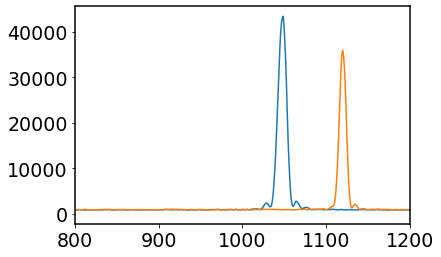

In [362]:
#plt.plot(np.array(TEM1_V["Distance_(pixels)"].to_list()), TEM1_V["Gray_Value"].to_list())
#plt.plot(np.array(TEM1_H["Distance_(pixels)"].to_list()), TEM1_H["Gray_Value"].to_list())

#plt.plot(np.array(TEM2_V["Distance_(pixels)"].to_list()), TEM2_V["Gray_Value"].to_list())
#plt.plot(np.array(TEM2_H["Distance_(pixels)"].to_list()), TEM2_H["Gray_Value"].to_list())

plt.plot(np.array(np.array(TEM3_V["Distance_(pixels)"].to_list())+500), TEM3_V["Gray_Value"].to_list())
plt.plot(np.array(np.array(TEM3_H["Distance_(pixels)"].to_list())), TEM3_H["Gray_Value"].to_list())


#REGIÕES DOS MÁXIMOS


#TEM1
#plt.xlim(300, 500)
#plt.xlim(500, 700)
#plt.xlim(700, 850)
#plt.xlim(850, 1000)
#plt.xlim(1000)

#TEM2
#plt.xlim(0, 445)
#plt.xlim(445, 690)
#plt.xlim(690, 950)
#plt.xlim(950, 1210)
#plt.xlim(1210)

#TEM3
#plt.xlim(500, 800)
plt.xlim(800, 1200)
#plt.xlim(1200)


In [360]:
len(np.array(TEM3_V["Gray_Value"].to_list()) + 500)

1145

In [368]:
TEM1_V_max = [max(TEM1_V["Gray_Value"].to_list()[300:500]), 
              max(TEM1_V["Gray_Value"].to_list()[500:700]), 
              max(TEM1_V["Gray_Value"].to_list()[700:850]), 
              max(TEM1_V["Gray_Value"].to_list()[850:1000]),
              max(TEM1_V["Gray_Value"].to_list()[1000:])]

TEM1_H_max = [max(TEM1_H["Gray_Value"].to_list()[300:500]), 
              max(TEM1_H["Gray_Value"].to_list()[500:700]), 
              max(TEM1_H["Gray_Value"].to_list()[700:850]), 
              max(TEM1_H["Gray_Value"].to_list()[850:1000]),
              max(TEM1_H["Gray_Value"].to_list()[1000:])]

TEM2_V_max = [max(TEM2_V["Gray_Value"].to_list()[0:445]), 
              max(TEM2_V["Gray_Value"].to_list()[445:690]), 
              max(TEM2_V["Gray_Value"].to_list()[690:950]),
              max(TEM2_V["Gray_Value"].to_list()[950:1210]),
              max(TEM2_V["Gray_Value"].to_list()[1210:])]

TEM2_H_max = [max(TEM2_H["Gray_Value"].to_list()[0:445]),
              max(TEM2_H["Gray_Value"].to_list()[445:690]),
              max(TEM2_H["Gray_Value"].to_list()[690:950]),
              max(TEM2_H["Gray_Value"].to_list()[950:1210]),
              max(TEM2_H["Gray_Value"].to_list()[1210:])]

TEM3_V_max = [max((np.array(TEM3_V["Gray_Value"].to_list()) + 500)[:300]),
              max((np.array(TEM3_V["Gray_Value"].to_list()) + 500)[300:700]),
              max((np.array(TEM3_V["Gray_Value"].to_list()) + 500)[700:])]

TEM3_H_max = [max((np.array(TEM3_H["Gray_Value"].to_list()) + 500)[:300]),
              max((np.array(TEM3_H["Gray_Value"].to_list()) + 500)[300:700]),
              max((np.array(TEM3_H["Gray_Value"].to_list()) + 500)[700:])]

#ESCOLHEMOS A QUE AMOSTRA FAZEMOS ANÁLISE
maximos = TEM3_H_max
data    = TEM3_H

linha   = data["Gray_Value"].to_list()

x = list()
for i in range(len(maximos)):
    x.append(linha.index(maximos[i]))

ValueError: 1480.8380000000002 is not in list

In [364]:
TEM2_H_max

[2080.496, 10464.292, 38286.016, 9568.496, 1343.474]

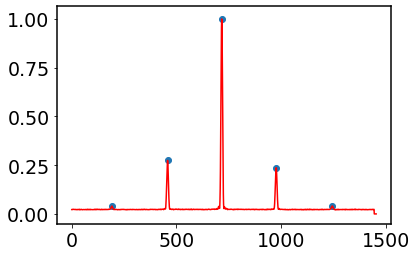

In [365]:
#plt.plot(linha)
plt.scatter(x, normalize(maximos))
plt.plot(normalize(data['Gray_Value']), color='red')

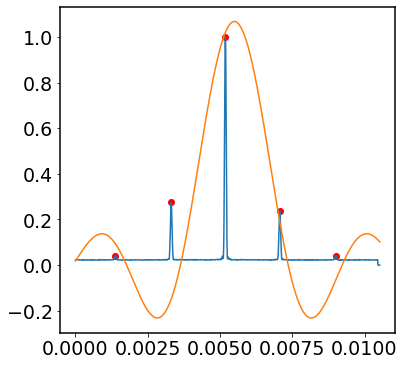

In [367]:
fig = plt.figure(figsize=(6, 6))

u = np.linspace(1, len(linha), len(linha))
u = convert(u)

plt.plot(u, normalize(linha))
plt.scatter(convert(np.array(x)), normalize(maximos), color='red')
plt.plot(u, fit_func(u, a=8.5e-5, I=4e3, u0=0.0055, offset=0))

In [334]:
popt, pcov = curve_fit(fit_func, convert(np.array(x)), normalize(maximos), p0=[8.5e-5, 4e3, 0.007, 0], maxfev=2000, bounds=([0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf]))

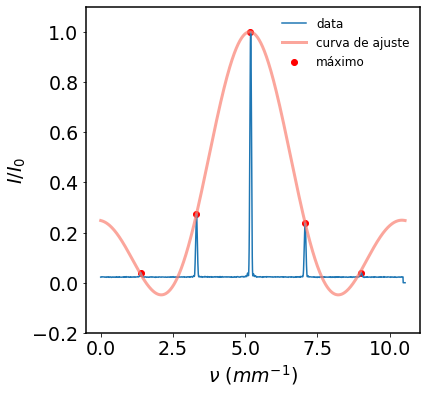

In [335]:
fig = plt.figure(figsize=(6, 6))

u = np.linspace(1, len(linha), len(linha))
u = convert(u)

plt.plot(scale(u, 1e3), normalize(linha), label='data')
plt.scatter(scale(convert(np.array(x)), 1e3), normalize(maximos), color='red', label='máximo')
plt.plot(scale(u, 1e3), fit_func(u, popt[0], popt[1], popt[2], popt[3]), color='salmon', lw=3, alpha=0.7, label='curva de ajuste')

plt.xlabel(r'$\nu$ ($mm^{-1}$)')
plt.ylabel(r'$I/I_0$')

plt.ylim(-0.2, 1.1)
plt.legend(fontsize=12, frameon=False)
plt.savefig('TEM2_a_V.pdf', bbox='tight')

In [336]:
print(str(popt[0]) + ' +/- ' + str(np.sqrt(pcov[0][0])))

7.399239221829226e-05 +/- 4.864074433089621e-07


In [524]:
def rita(p1):
    return p1*(l*0.25*pc)/(np.pi*A)

In [525]:
rita(0.006439)

2.34675883278475e-15

# FERRO DE SOLDAR